In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0
...,...,...,...,...,...,...,...,...,...,...
29995,45,Male,Masters,14,Married,State-gov,Prof-specialty,60,>50K,1
29996,33,Male,HS-grad,9,Married,Private,Machine-op-inspct,40,>50K,1
29997,47,Male,Prof-school,15,Married,Private,Prof-specialty,55,>50K,1
29998,32,Female,Some-college,10,Never-married,Private,Adm-clerical,40,<=50K,0


In [31]:
print(len(df))
df.tail()

30000


,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
29995,23,Male,Some-college,10,Never-married,Private,Other-service,40,<=50K,0
29996,23,Female,Some-college,10,Never-married,Private,Sales,30,<=50K,0
29997,18,Male,12th,8,Never-married,Private,Other-service,25,<=50K,0
29998,20,Male,Some-college,10,Never-married,Private,Prof-specialty,25,<=50K,0
29999,43,Male,Bachelors,13,Married,Private,Exec-managerial,50,>50K,1


In [4]:
df['label'].value_counts()

0    21700
1     8300
Name: label, dtype: int64

In [5]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [6]:
cat_cols = ['sex', 'education', 'marital-status', 'workclass', 'occupation'] 
cont_cols = ['age', 'hours-per-week']  
y_col = ['label']  


print(f'cat_cols  has {len(cat_cols)} columns')
print(f'cont_cols has {len(cont_cols)} columns')
print(f'y_col     has {len(y_col)} column')

cat_cols  has 5 columns
cont_cols has 2 columns
y_col     has 1 column


In [7]:
for col in cat_cols:
    df[col] = df[col].astype('category')

df[cat_cols].dtypes

sex               category
education         category
marital-status    category
workclass         category
occupation        category
dtype: object

In [8]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=101)
df.reset_index(drop=True, inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,23,Female,HS-grad,9,Never-married,Private,Other-service,50,<=50K,0
1,37,Female,Prof-school,15,Married,State-gov,Prof-specialty,39,>50K,1
2,34,Male,Some-college,10,Divorced,Private,Adm-clerical,40,<=50K,0
3,31,Male,HS-grad,9,Married,Private,Craft-repair,40,>50K,1
4,20,Female,Some-college,10,Never-married,Private,Sales,25,<=50K,0


In [9]:
df = shuffle(df, random_state=101)
df.reset_index(drop=True,inplace=True)
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,30,Male,Some-college,10,Married,Private,Transport-moving,80,>50K,1
1,69,Male,Masters,14,Married,Private,Prof-specialty,25,<=50K,0
2,49,Male,HS-grad,9,Married,Private,Transport-moving,48,>50K,1
3,43,Male,Some-college,10,Married,Private,Machine-op-inspct,40,<=50K,0
4,42,Male,HS-grad,9,Married,Private,Exec-managerial,50,>50K,1


In [10]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, (size+1)//2) for size in cat_szs]
emb_szs

[(2, 1), (14, 7), (6, 3), (5, 3), (12, 6)]

In [11]:
cats = np.stack([df[col].cat.codes.values for col in cat_cols], axis=1)
cats[:5]

array([[ 1, 13,  1,  2, 11],
       [ 1, 11,  1,  2,  7],
       [ 1, 10,  1,  2, 11],
       [ 1, 13,  1,  2,  5],
       [ 1, 10,  1,  2,  2]], dtype=int8)

In [12]:
cats = torch.tensor(cats, dtype=torch.int64)

In [13]:
conts = np.stack([df[col].values for col in cont_cols], axis=1)
conts[:5]

array([[30, 80],
       [69, 25],
       [49, 48],
       [43, 40],
       [42, 50]], dtype=int64)

In [14]:
conts = torch.tensor(conts, dtype=torch.float32)
conts.dtype

torch.float32

In [15]:
y = torch.tensor(df[y_col].values, dtype=torch.int64).flatten()

In [16]:
b = 30000  
t = 5000  
cat_train = cats[:b-t]
cat_test  = cats[b-t:b]
con_train = conts[:b-t]
con_test  = conts[b-t:b]
y_train = y[:b-t]
y_test  = y[b-t:b]

In [17]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((nf for ni, nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i

        layerlist.append(nn.Linear(layers[-1], out_sz))
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = [e(x_cat[:, i]) for i, e in enumerate(self.embeds)]
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)

        x = self.layers(x)
        return x


In [18]:
torch.manual_seed(33)

In [19]:
model = TabularModel(emb_szs, n_cont=len(cont_cols), out_sz=2, layers=[50], p=0.4)

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [21]:
epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)

    if i % 25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


epoch:   1  loss: 0.81006557
epoch:  26  loss: 0.59268230
epoch:  51  loss: 0.51451385
epoch:  76  loss: 0.46563661
epoch: 101  loss: 0.43257797
epoch: 126  loss: 0.40289918
epoch: 151  loss: 0.37922528
epoch: 176  loss: 0.36555341
epoch: 201  loss: 0.35053301
epoch: 226  loss: 0.34021521
epoch: 251  loss: 0.33193547
epoch: 276  loss: 0.32308403


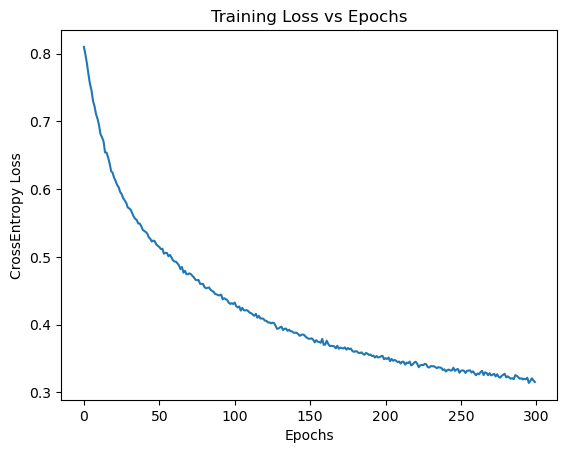

In [22]:
plt.plot(range(epochs), [l.item() for l in losses])
plt.xlabel("Epochs")
plt.ylabel("CrossEntropy Loss")
plt.title("Training Loss vs Epochs")
plt.show()

In [23]:
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.32553774


In [24]:
correct = 0
for i in range(len(y_test)):
    if y_val[i].argmax().item() == y_test[i].item():
        correct += 1
print(f'{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

4259 out of 5000 = 85.18% correct


In [27]:
def predict_income():
    model.eval()

    age = int(input("What is the person's age? (18-90) "))
    sex = input("What is the person's sex? (Male/Female) ")
    education_num = int(input("What is the person's education level? (3-16) "))
    marital_status = input("What is the person's marital status? ")
    workclass = input("What is the person's workclass? ")
    occupation = input("What is the person's occupation? ")
    hours = int(input("How many hours/week are worked? (20-90) "))

    sex_d = dict(Female=0, Male=1)
    edu_d = {cat: i for i, cat in enumerate(df['education'].cat.categories)}
    mar_d = {cat: i for i, cat in enumerate(df['marital-status'].cat.categories)}
    work_d = {cat: i for i, cat in enumerate(df['workclass'].cat.categories)}
    occ_d = {cat: i for i, cat in enumerate(df['occupation'].cat.categories)}

    sex = sex.strip()
    marital_status = marital_status.strip()
    workclass = workclass.strip()
    occupation = occupation.strip()

    cats = torch.tensor([
        sex_d[sex],
        edu_d[df[df['education-num']==education_num]['education'].iloc[0]],
        mar_d[marital_status],
        work_d[workclass],
        occ_d[occupation]
    ], dtype=torch.int64).reshape(1, -1)

    conts = torch.tensor([age, hours], dtype=torch.float32).reshape(1, -1)

    with torch.no_grad():
        output = model(cats, conts)
        pred = torch.argmax(output, dim=1).item()

    print(f"\nThe predicted label is {pred}")


In [30]:
predict_income()

What is the person's age? (18-90) 22
What is the person's sex? (Male/Female) Male
What is the person's education level? (3-16) 12
What is the person's marital status? Married
What is the person's workclass? Private
What is the person's occupation? Sales
How many hours/week are worked? (20-90) 40

The predicted label is 0


In [32]:
print("Trupathi Jayadeep")
print("212223240169")

Trupathi Jayadeep
212223240169
